In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

fb = pd.read_csv('Publicacions Facebook Thailandia.csv')

fb

status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0             1         1           0      NaN      NaN      NaN      NaN  
1             0         0           0      NaN      NaN      NaN      NaN  
2             1         0           0      NaN      NaN      NaN      NaN  
3             0         0           0      NaN      NaN      NaN      NaN  
4             0         0           0      NaN      NaN      NaN      NaN  
...         ...       ...         ...      ...      ...      ...      ...  
7045          0         0           0      NaN      NaN      NaN      NaN  
7046          1         0           0      NaN      NaN      NaN      NaN  
7047          0         0           0      NaN      NaN      NaN      NaN  
7048          0         0           0      NaN      NaN      NaN      NaN  
7049          0         0           0      NaN      NaN      NaN      NaN  

[7050 rows x 16 columns]

En este dataset sobre publicaciones en Facebook en Tailandia, disponemos de varias características para cada una de ellas, como la fecha y hora, el formato, los tipos de reacciones, como también los 'shares' (o re-publicaciones) y finalmente los comentarios. Estos datos fueron registrados entre septiembre de 2012 y abril de 2018.

Durante esta tarea, en primer lugar haremos un preprocesamiento de los datos, para así eliminar columnas y registros duplicados y nulos. Una vez preprocesado el dataset aplicaremos un modelo de transformación de los datos, y así reducir sus dimensiones mediante la herramienta Principal Component Analysis (PCA) en vistas a representarlo gráficamente. Para ello tendremos en cuenta el objetivo de este análisis, que es el de determinar qué tipo de publicaciones son más propensas a aumentar el número de reacciones, comentarios y re-publicaciones.

Una vez hecho ésto, y antes de aplicar el modelo K-Means, calcularemos el mejor valor para la variable K, que se refiere al número de clusters en los que clasificaremos el dataset. Este valor nos lo proporcionarán coeficientes como el elbow/knee o el silhouette, y tras aplicar el modelo, éste asignará un número de cluster para cada registro. Con toda esta información, crearemos un nuevo dataset e interpretaremos los resultados comparándolos con las categorías de las que ya disponemos (vídeo, foto, link, status).

Por último, haremos lo mismo pero con el Agglomerative Clustering para también interpretar sus resultados.

En una primera aproximación al dataset, vemos ya que hay 4 columnas que parecen no contener datos ni características, por lo que podríamos eliminarlas directamente. Lo confirmamos al consultar sus valores nulos y, en caso afirmativo, borramos las columnas.

In [55]:
fb.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [56]:
fb = fb[fb.columns[:-4]]
fb

status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  
0             1         1           0  
1             0         0           0  
2             1         0           0  
3             0         0           0  
4             0         0           0  
...         ...       ...         ...  
7045          0         0           0  
7046          1         0           0  
7047          0         0           0  
7048          0         0           0  
7049          0         0           0  

[7050 rows x 12 columns]

Ahora que ya sabemos que no tenemos ni filas ni columnas con registros nulos, procedemos a consultar si existen duplicados.

Para ello, lo mejor es preguntar directamente a la columna 'status_id' si dispone de duplicados, ya que esta columna nos sirve para diferenciar los registros entre sí. En el resto de columnas pueden haber y hay duplicados, incluso en la hora y la fecha de publicación, pero no en la columna 'status_id', pues dos observaciones iguales no deberían de ocupar el mismo espacio en un dataset.

In [57]:
print('Duplicados en "id_status":', fb.status_id.duplicated().sum())

Duplicados en "id_status": 53


Consultamos ahora de manera más específica qué columnas, además del 'status_id', comparten los mismos valores.

In [58]:
duplicated_data = fb[fb.status_id.duplicated() == True]
duplicated_data.count()

status_id           53
status_type         53
status_published    53
num_reactions       53
num_comments        53
num_shares          53
num_likes           53
num_loves           53
num_wows            53
num_hahas           53
num_sads            53
num_angrys          53
dtype: int64

Los 53 registros son exactamente iguales en todas sus columnas. Para acabar de confirmarlo, consultamos qué registros son los duplicados y accedemos de manera individual a dos de ellos para verlos lo más cerca posible.

In [59]:
duplicated_data.head()

status_id status_type status_published  \
1698   246675545449582_326883450762124       photo  10/11/2013 8:23   
1729   246675545449582_429583263825475       photo   9/11/2013 0:12   
6221  819700534875473_1002372733274918       video   6/10/2018 3:43   
6222  819700534875473_1001982519980606       photo   6/9/2018 22:53   
6223  819700534875473_1000607730118085       photo    6/7/2018 7:01   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
1698            211             2           0        211          0         0   
1729            537            16           1        537          0         0   
6221            376            20           3        354         19         3   
6222            255             7           4        249          6         0   
6223           1704            21           3       1685         15         2   

      num_hahas  num_sads  num_angrys  
1698          0         0           0  
1729          0         0           0  
6221          0         0           0  
6222          0         0           0  
6223          2         0           0

In [60]:
fb[fb.status_id == '246675545449582_326883450762124']

status_id status_type status_published  \
1488  246675545449582_326883450762124       photo   2/14/2014 3:07   
1698  246675545449582_326883450762124       photo  10/11/2013 8:23   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
1488            211             2           0        211          0         0   
1698            211             2           0        211          0         0   

      num_hahas  num_sads  num_angrys  
1488          0         0           0  
1698          0         0           0

In [61]:
fb[fb.status_id == '246675545449582_429583263825475']

status_id status_type status_published  \
1408  246675545449582_429583263825475       photo   4/22/2014 5:43   
1729  246675545449582_429583263825475       photo   9/11/2013 0:12   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
1408            537            16           1        537          0         0   
1729            537            16           1        537          0         0   

      num_hahas  num_sads  num_angrys  
1408          0         0           0  
1729          0         0           0

Confirmamos que se tratan de 53 registros duplicados, por lo que procedemos a eliminarlos del dataset.

In [62]:
fb = fb.drop_duplicates(subset='status_id', keep='last')
fb.reset_index(inplace=True, drop=True)

fb.shape

(6997, 12)

Por otro lado, también tenemos la columna 'num_reactions', que indica la suma de los valores de las columnas con reacciones como 'num_likes' o 'num_loves' entre otras.

Para ello creamos una nueva columna con la suma de las últimas 6 columnas y vemos si existe una diferencia entre ambas.

In [63]:
fb['sum_num_reactions'] = fb.iloc[:,-6:].sum(axis=1)

fb['missmatch'] = fb.sum_num_reactions != fb.num_reactions

In [64]:
fb.missmatch.value_counts()

False    6988
True        9
Name: missmatch, dtype: int64

In [65]:
fb.sort_values(by='missmatch', ascending=False)[:10]

status_id status_type status_published  \
254   246675545449582_1317164368400689       photo   6/10/2017 8:19   
248   246675545449582_1319907678126358       photo   6/13/2017 1:31   
238   246675545449582_1331955210254938       video   6/25/2017 7:42   
293   246675545449582_1262985247151935       video   4/20/2017 2:36   
247   246675545449582_1320853268031799       photo  6/13/2017 23:17   
251   246675545449582_1319045328212593       photo   6/12/2017 5:08   
257   246675545449582_1315331711917288       photo    6/8/2017 9:26   
253   246675545449582_1318160668301059       photo   6/11/2017 7:04   
256   246675545449582_1316848781765581       photo   6/10/2017 1:08   
4675   725980084255106_816810381838742       photo   2/15/2018 9:29   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
254             178             9           0        170          6         0   
248             313             3           0        297          7         6   
238             885           462          26        659        220         0   
293             616           523          21        459        125        21   
247             264             2           0        256          2         5   
251             247             6           0        234          9         1   
257             351             4           1        344          6         0   
253             387             3           0        368         16         1   
256             270             3           0        256         10         3   
4675            812            67           2        806          0         4   

      num_hahas  num_sads  num_angrys  sum_num_reactions  missmatch  
254           0         0           0                176       True  
248           0         0           0                310       True  
238           2         0           0                881       True  
293           8         0           1                614       True  
247           0         0           0                263       True  
251           0         0           0                244       True  
257           0         0           0                350       True  
253           0         0           0                385       True  
256           0         0           0                269       True  
4675          0         2           0                812      False

Se trata de 9 registros que muestran un valor equivocado poco significante, por lo que sencillamente corregimos la columa 'num_reactions' con el valor correcto en lugar de eliminar las observaciones enteras.

Para corregir estos registros, creamos una nueva columna más con la diferencia entre 'num_reactions' y la columna con la suma de las otras reacciones que acabamos de hacer, para después restársela a 'num_reactions' y así obtener los nuevos valores.

In [66]:
fb['missmatch_value'] = fb.num_reactions - fb.sum_num_reactions

In [67]:
fb.num_reactions = fb.num_reactions - fb.missmatch_value

In [68]:
fb.sort_values(by='missmatch', ascending=False)[:10]

status_id status_type status_published  \
254   246675545449582_1317164368400689       photo   6/10/2017 8:19   
248   246675545449582_1319907678126358       photo   6/13/2017 1:31   
238   246675545449582_1331955210254938       video   6/25/2017 7:42   
293   246675545449582_1262985247151935       video   4/20/2017 2:36   
247   246675545449582_1320853268031799       photo  6/13/2017 23:17   
251   246675545449582_1319045328212593       photo   6/12/2017 5:08   
257   246675545449582_1315331711917288       photo    6/8/2017 9:26   
253   246675545449582_1318160668301059       photo   6/11/2017 7:04   
256   246675545449582_1316848781765581       photo   6/10/2017 1:08   
4675   725980084255106_816810381838742       photo   2/15/2018 9:29   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
254             176             9           0        170          6         0   
248             310             3           0        297          7         6   
238             881           462          26        659        220         0   
293             614           523          21        459        125        21   
247             263             2           0        256          2         5   
251             244             6           0        234          9         1   
257             350             4           1        344          6         0   
253             385             3           0        368         16         1   
256             269             3           0        256         10         3   
4675            812            67           2        806          0         4   

      num_hahas  num_sads  num_angrys  sum_num_reactions  missmatch  \
254           0         0           0                176       True   
248           0         0           0                310       True   
238           2         0           0                881       True   
293           8         0           1                614       True   
247           0         0           0                263       True   
251           0         0           0                244       True   
257           0         0           0                350       True   
253           0         0           0                385       True   
256           0         0           0                269       True   
4675          0         2           0                812      False   

      missmatch_value  
254                 2  
248                 3  
238                 4  
293                 2  
247                 1  
251                 3  
257                 1  
253                 2  
256                 1  
4675                0

In [69]:
fb['missmatch'] = fb.sum_num_reactions != fb.num_reactions
fb.missmatch.value_counts()

False    6997
Name: missmatch, dtype: int64

Eliminamos finalmente estas columnas que acabamos de crear, pues ya no nos son de utilidad.

In [70]:
fb = fb[fb.columns[:-3]]
fb

status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
6992  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
6993  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
6994  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
6995  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
6996  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
6992             89             0           0         89          0         0   
6993             16             0           0         14          1         0   
6994              2             0           0          1          1         0   
6995            351            12          22        349          2         0   
6996             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  
0             1         1           0  
1             0         0           0  
2             1         0           0  
3             0         0           0  
4             0         0           0  
...         ...       ...         ...  
6992          0         0           0  
6993          1         0           0  
6994          0         0           0  
6995          0         0           0  
6996          0         0           0  

[6997 rows x 12 columns]

Ahora ya coinciden todos los valores, podemos consultar el tipo de datos que conforman el dataset.

In [71]:
fb.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

Observamos que hay tres columnas que son objetos y el resto integers. En el caso de las columnas con números, es normal que sean integers, pues al ver qué es lo que cuantifican, entendemos porqué son valores enteros (no tiene sentido hablar de medio 'comment' o de un tercio de 'like').

La primera de estas columnas es 'status_id' que, como comentábamos, nos indica el código de la observación única además de tratarse de una variable categórica. Ahora sin embargo, dado que 'status_id' ya nos ha revelado los registros duplicados, podemos prescindir de ella y nos quedamos con el índice en su lugar.

Por otro lado, también eliminaremos la columna 'status_published', a pesar de que podríamos traducir los días y meses de cada año para que nos revele los mejores periodos para obtener más reacciones, comentarios y shares.

In [72]:
# fb.status_published=pd.to_datetime(fb.status_published)

# fb["day"] = fb['status_published'].map(lambda x: x.day)
# fb["month"] = fb['status_published'].map(lambda x: x.month)
# fb["year"] = fb['status_published'].map(lambda x: x.year)

# fb

In [73]:
fb.drop(['status_published', 'status_id'], axis=1, inplace=True)
fb

status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
6992       photo             89             0           0         89   
6993       photo             16             0           0         14   
6994       photo              2             0           0          1   
6995       photo            351            12          22        349   
6996       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1             0         0          0         0           0  
2            21         1          1         0           0  
3             0         0          0         0           0  
4             9         0          0         0           0  
...         ...       ...        ...       ...         ...  
6992          0         0          0         0           0  
6993          1         0          1         0           0  
6994          1         0          0         0           0  
6995          2         0          0         0           0  
6996          0         0          0         0           0  

[6997 rows x 10 columns]

Ahora exploramos la columna 'status_type' y consultamos sus valores únicos y su tamaño.

In [74]:
fb.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [75]:
fb.status_type.value_counts()

photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64

Para conocer mejor el dataset consultamos su distribución con un 'scatterplot' con tres ejes, ya que disponemos de tres variables, 'num_reactions', 'num_comments' y 'num_shares', que contienen toda la información disponible que hemos seleccionado para interpretar este dataset.

En el gráfico podemos apreciar que las observaciones de todas las clases, ya sean vídeos, enlaces, fotografías o estados, se mantienen en gran parte como reacciones ('num_reactions') y no como comentarios ('num_comments') o re-publicaiones ('num_shares').

Por otro lado, también podemos observar que el mayor número de comentarios y de re-publicaciones para una misma publicación se concentran en el formato vídeo, y no en el de fotografía, enlace o estado. En este respecto, también es interesante la diferencia entre el número máximo de reacciones de 4710 para una publicación con fotografía y el número máximo de comentarios de 20990 para un vídeo.

Por lo tanto, podemos establecer que existe una clara diferencia entre el vídeo y el resto de los formatos en lo que respecta a la popularidad que alcanzan publicaciones individuales.

In [76]:
import plotly.express as px

colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2], colors[3] = ['red', 'yellow', 'blue', 'white']
fig = px.scatter_3d(fb, x='num_comments', y='num_reactions', z='num_shares', color=fb['status_type'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=True,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

En el siguiente grafico 'pairplot' podemos confirmar que no solo los valores más altos de las las variables 'num_comments' y 'num_shares' están asociados a la clase vídeo, sino también para el tipo de reacción 'num_loves' o 'num_wows', pero que en general el número de reacciones se expresa en el número de likes (de ahí la correlación positiva ascendente entre 'num_likes' y 'num_reactions' que también vemos en este gráfico).

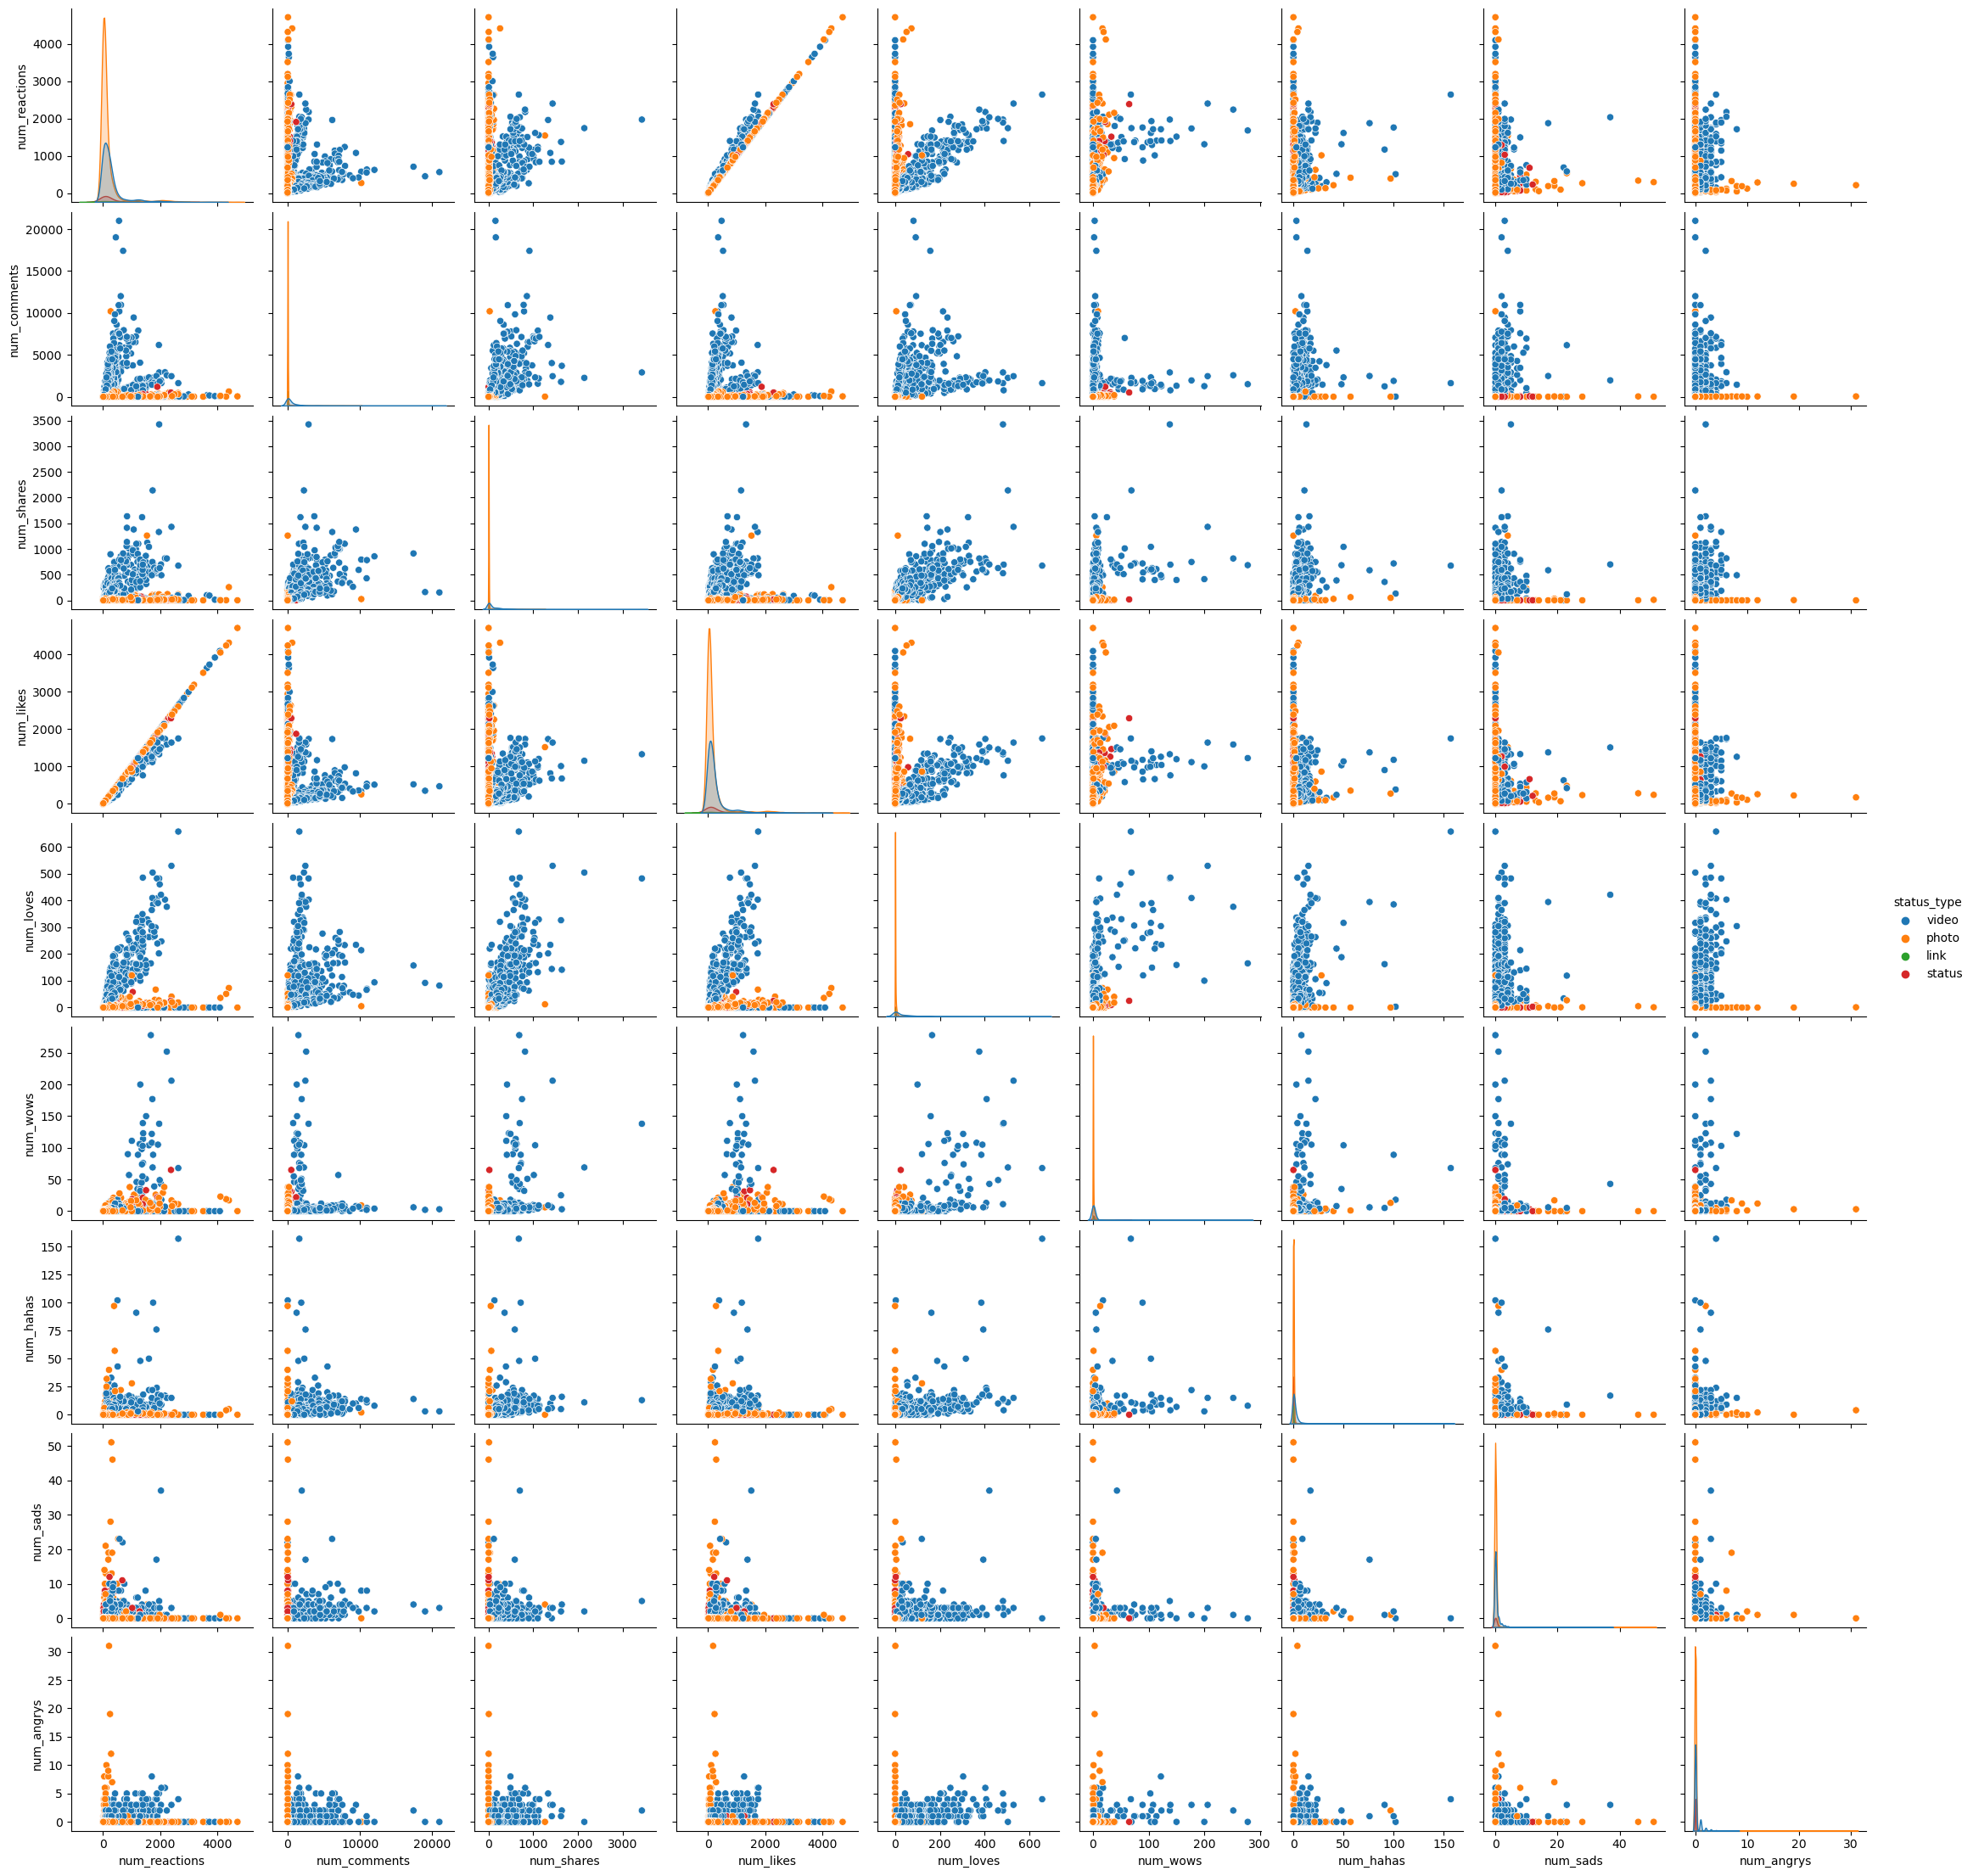

In [77]:
sns.pairplot(fb, hue='status_type', palette="tab10")

plt.show()

Ahora que hemos diferenciado entre el número de comentarios y re-publicaciones, y el número de reacciones por un lado, y por el otro, entre el tipo de formato vídeo y el resto de formatos fotografía, enlace o estado, podemos consultar un histograma de las diferentes variables para conocer su frecuencia respecto a la totalidad de las observaciones.

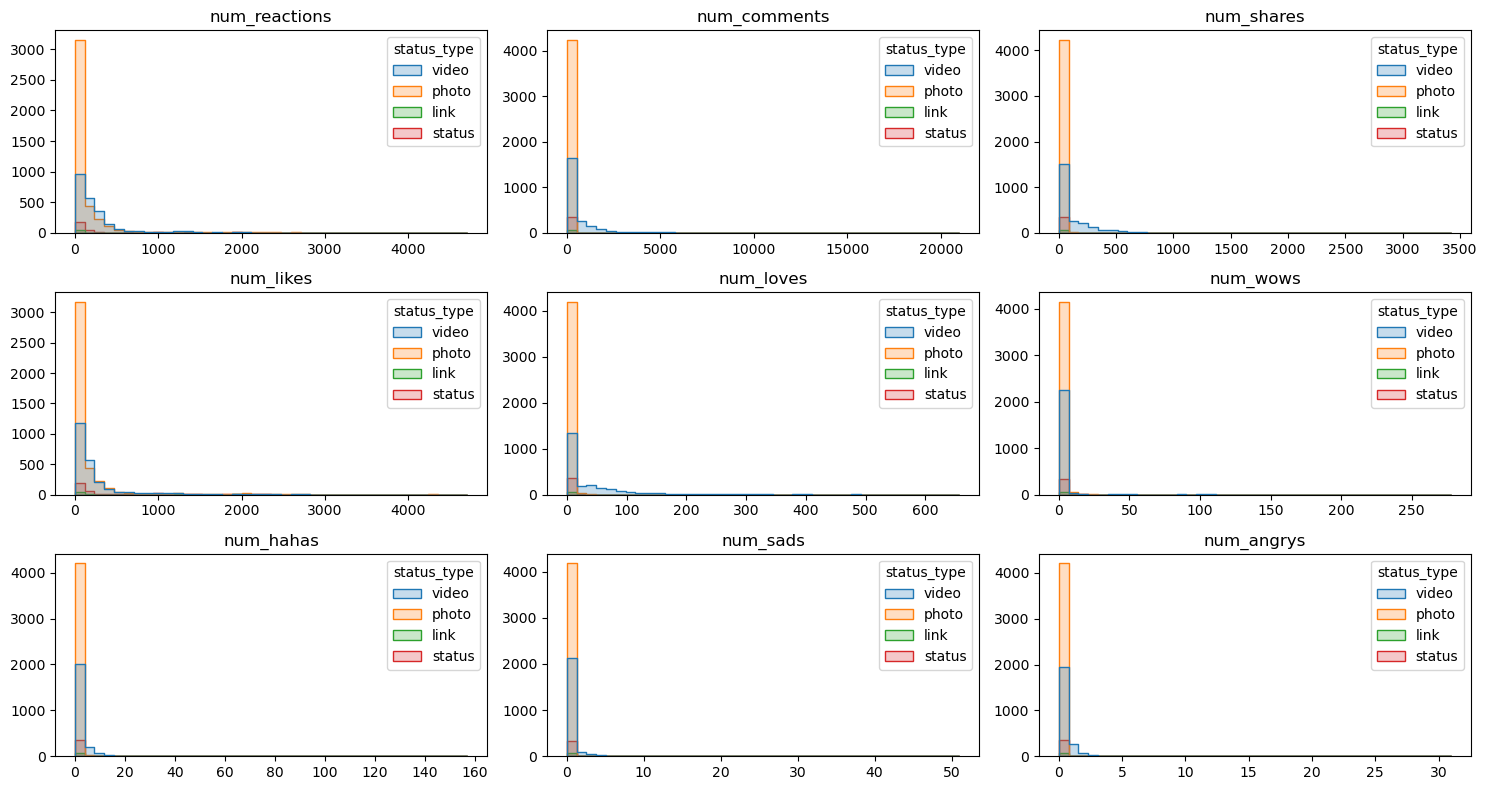

In [78]:
fig, axs = plt.subplots(3, 3, figsize=(15, 8))

for i, ax in enumerate(fig.get_axes()):
    if i < 13:
        feature = fb.columns[1:13][i]
        sns.histplot(fb, x=feature, bins=40, hue='status_type', element='step', ax=ax)
        ax.set_title(feature)
        ax.set_ylabel('')
        ax.set_xlabel('')
plt.tight_layout()
plt.show()

In [79]:
fb.describe().T

count        mean         std  min   25%   50%    75%      max
num_reactions  6997.0  224.949264  452.928767  0.0  17.0  58.0  216.0   4710.0
num_comments   6997.0  225.613977  892.863091  0.0   0.0   4.0   22.0  20990.0
num_shares     6997.0   40.269973  132.064065  0.0   0.0   0.0    4.0   3424.0
num_likes      6997.0  209.899814  439.595761  0.0  17.0  57.0  182.0   4710.0
num_loves      6997.0   12.755181   40.112024  0.0   0.0   0.0    3.0    657.0
num_wows       6997.0    1.253251    8.726772  0.0   0.0   0.0    0.0    278.0
num_hahas      6997.0    0.698156    3.971462  0.0   0.0   0.0    0.0    157.0
num_sads       6997.0    0.232671    1.481312  0.0   0.0   0.0    0.0     51.0
num_angrys     6997.0    0.110190    0.688678  0.0   0.0   0.0    0.0     31.0

Vemos que acumulan gran parte de los registros en los valores más bajos. Por lo tanto, nos encontramos con una distribución muy inclinada hacia la izquierda.

Esto también nos indica la presencia de outliers, pero para acabar de completar la visualización, consultamos un 'boxplot'.

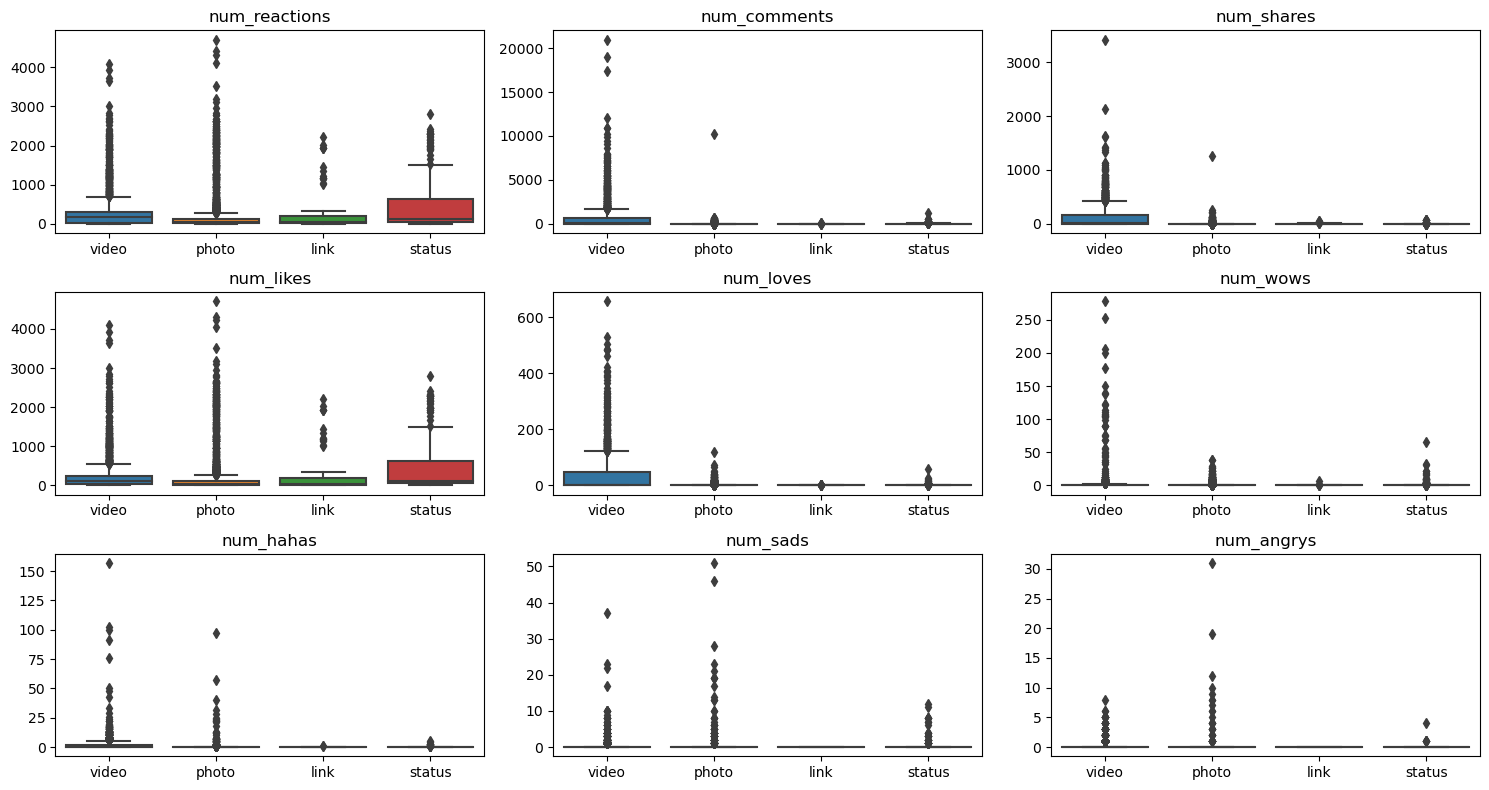

In [80]:
fig, axs = plt.subplots(3, 3, figsize=(15, 8))

for i, ax in enumerate(fig.get_axes()):
    if i < 13:
        feature = fb.columns[1:][i]
        sns.boxplot(fb, x='status_type', y=feature, ax=ax, palette="tab10")
        ax.set_title(feature)
        ax.set_ylabel('')
        ax.set_xlabel('')
plt.tight_layout()
plt.show()

Como hemos podido comprobar en los diferentes gráficos y la función 'describe()', la presencia de outliers es muy patente y la distribución de los datos altamente irregular.

En caso de que quisiésemos reducir, o directamente eliminar, la importancia de los outliers, aplicaríamos un método de transformación como el 'Robust Scaler'. Sin embargo, en este caso en concreto los outliers son algo que queremos conservar. Esto es debido a que las observaciones más populares son las que más nos interesan, pues la finalidad de este estudio es conseguir publicaciones más populares.

Por lo tanto, dado que queremos conservar los 'outliers', la mejor opción es el 'MinMax Scaler', pues como bien dice su propio nombre, escala las variables al poner el valor mínimo en '0' y el máximo en '1', pero sin modificar la proporción orignal del dataset.

Escalamos el dataset a partir de la segunda columna, pues la primera, 'status_type', es categórica.

In [81]:
from sklearn.preprocessing import MinMaxScaler

X = fb.iloc[:, 1:]

cols = X.columns

X_scaled = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=[cols])

X_scaled.head()

num_reactions num_comments num_shares num_likes num_loves  num_wows  \
0      0.112314     0.024393   0.076519  0.091720  0.140030  0.010791   
1      0.031847     0.000000   0.000000  0.031847  0.000000  0.000000   
2      0.048195     0.011243   0.016647  0.043312  0.031963  0.003597   
3      0.023567     0.000000   0.000000  0.023567  0.000000  0.000000   
4      0.045223     0.000000   0.000000  0.043312  0.013699  0.000000   

  num_hahas  num_sads num_angrys  
0  0.006369  0.019608        0.0  
1  0.000000  0.000000        0.0  
2  0.006369  0.000000        0.0  
3  0.000000  0.000000        0.0  
4  0.000000  0.000000        0.0

Ahora que hemos transformado los datos, ya podemos proceder y reducir la dimensionalidad del dataset a dos dimensiones mediante el PCA. Gracias al Principal Component Analysis podemos reducir las variables que necesitemos para represerntarlo gráficamente de manera más intuitiva con 2 o 3 dimensiones.

En este caso, reduciremos a 3 dimensiones el datset.

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_scaled_pca = pca.fit_transform(X_scaled)

X_scaled_pca = pd.DataFrame(data=X_scaled_pca)
X_scaled_pca.columns = ['PC' + str(col+1) for col in X_scaled_pca.columns.values]

X_scaled_pca.head()

PC1       PC2       PC3
0  0.105164  0.106953 -0.024809
1 -0.025524 -0.021499 -0.001739
2  0.001872  0.010861 -0.004376
3 -0.036944 -0.018938 -0.002081
4 -0.006063 -0.015334 -0.006176

In [83]:
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_.cumsum())

Proporción de varianza explicada por cada componente: [0.66360866 0.86364944 0.90870233]


La proporción de la varianza se refiere al porcentaje que cada componente (en este caso 'PC1', 'PC2' y 'PC3') representa una parte de la totalidad del dataset. Por lo que respecta a la proporción restante para llegar a 1, no sabría explicar muy bien a qué se debe, pero entiendo que puede tratarse ya de un márgen de error.

En cualquier caso, ahora ya podemos proceder con aplicar el modelo Kmeans Clustering. Este modelo, además de necesitar un escalado de la información, también requiere que asignemos un número de clusters inicial para entrenar al modelo. Sin embargo, no disponemos de este número, por lo que podemos hacer una serie de tests con diferentes valores 'k', y así obtener el que mejor resultados nos dé.

En primer lugar, calculamos el 'codo', 'elbow', gráfico que nos dará el número de clusters óptimo cuando la línea se asemeja a un codo. En este caso parece que es el número '2' la mejor opción, aunque es posible que también lo sea el '3'. 

In [84]:
from sklearn.cluster import KMeans

kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 1}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled_pca)
    sse.append(kmeans.inertia_)

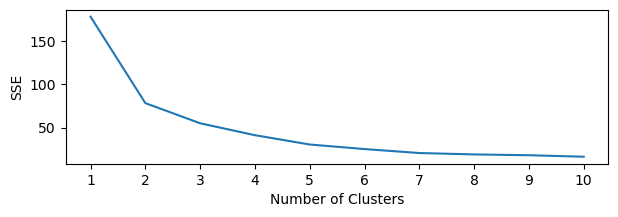

In [85]:
plt.figure(figsize=(7, 2))

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Hacemos otro test para corroborar la información al buscar la 'Knee' o rodilla. En estecaso, parece que nos da el número 3, aunque también hay dudas de si podría ser el 2.

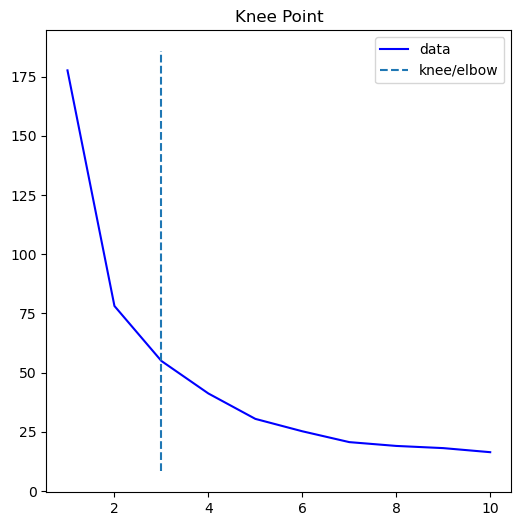

In [86]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11), sse, curve = 'convex', direction = 'decreasing')

kl.plot_knee()

Finalmente podemos hacer una tercera prueba con la herramienta silhouette, que también nos proporciona un valor 'k'. Ahora vemos que el número 3 adquiere un valor más elevado.

In [87]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled_pca)
    score = silhouette_score(X_scaled_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

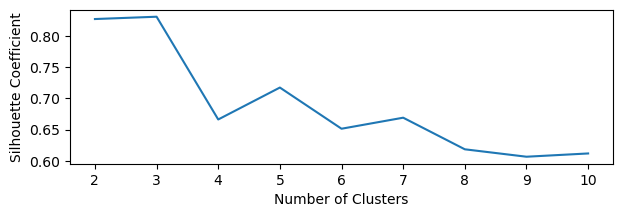

In [88]:
plt.figure(figsize=(7, 2))

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

A pesar de que no está claro, procederemos con 3 clusters, ya que sabemos por lo que hemos investigado sobre el dataset hasta el momento que 3 clusters nos pueden dar más información.

Con el modelo entrenado añadimos una nueva columna con el número de cluster asignado.

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=1)

kmeans.fit_predict(X_scaled_pca)

X_scaled_pca['cluster_kmeans'] = kmeans.labels_

In [90]:
X_scaled_pca.head()

PC1       PC2       PC3  cluster_kmeans
0  0.105164  0.106953 -0.024809               0
1 -0.025524 -0.021499 -0.001739               0
2  0.001872  0.010861 -0.004376               0
3 -0.036944 -0.018938 -0.002081               0
4 -0.006063 -0.015334 -0.006176               0

In [91]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(kmeans.n_iter_)

[[-0.0341064  -0.00199075 -0.00077154]
 [ 0.45011835 -0.12063155  0.01074358]
 [ 0.29099199  0.32739321  0.00539685]]
54.90357746801703
19


Con estos parámetros podemos obtener la posición de los 'cluster_centers_' o centroides para cada uno de los clusters que hemos asignado. En relación a la 'inertia', lo mejor es obtener valores bajos, y finalmente 'n_iter' es el número de iteraciones que ha hecho el modelo para llegar a las coordenadas finales de los tres centroides.

Ahora ya disponemos de información para poder hacer un gráfico y hacernos una idea de qué manera el modelo ha asignado un número de cluster para cada observación con la información que le hemos proporcionado. Al mismo tiempo también dibujamos el símbolo de una cruz para indicar la posición final de cada uno de los 3 clusters.

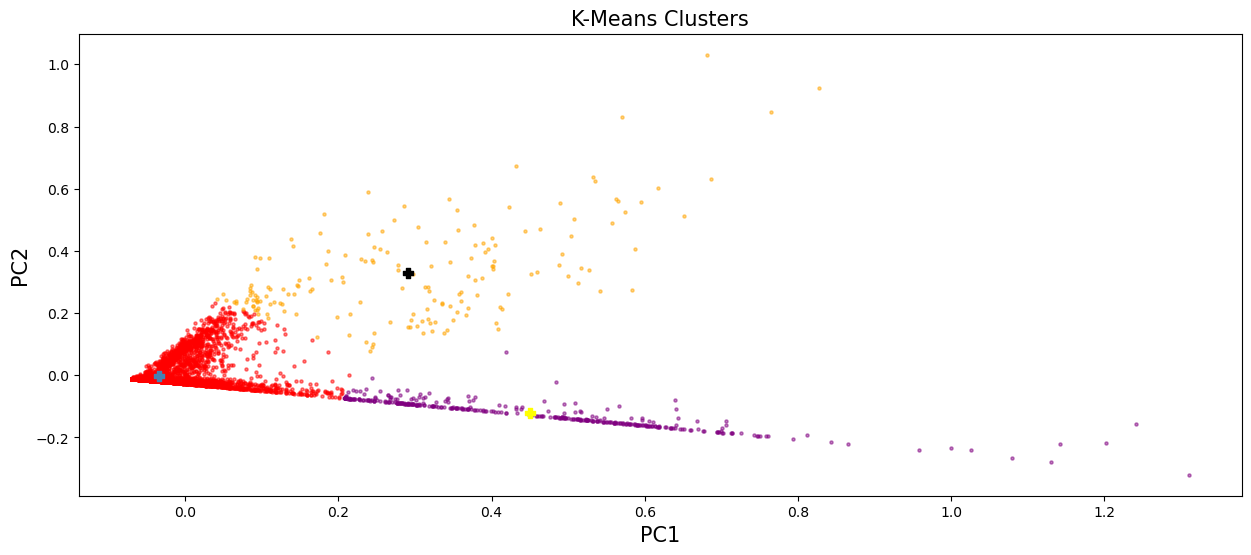

In [92]:
plt.figure(figsize=(15, 6), dpi=100)

colores = ["red", "purple", "orange", "white", "purple", "pink", "brown"]
colores_1 = ["steelblue", "yellow", 'black', 'pink']

for cluster in range(kmeans.n_clusters):
    plt.scatter(X_scaled_pca[X_scaled_pca['cluster_kmeans'] == cluster]['PC1'],
                X_scaled_pca[X_scaled_pca['cluster_kmeans'] == cluster]['PC2'],
                marker='o', s=5, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=50, color=colores_1[cluster])

plt.title("K-Means Clusters", fontsize=15)
plt.xlabel("PC1", fontsize=15)
plt.ylabel("PC2", fontsize=15) 
plt.show()

Si bien nos falta el componente 'PC3', en este gráfico podemos comprobar que la distribución de los datos es muy similar a la representación que hemos visto inicialmente. También vemos la posición de cada uno de los 3 clusters. Sin embargo, para hacernos una mejor idea, lo representamos con los tres componentes.

In [93]:
import plotly.express as px

colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2], colors[3] = ['red', 'yellow', 'blue', 'white']
fig = px.scatter_3d(X_scaled_pca, x='PC1', y='PC2', z='PC3', color=X_scaled_pca['cluster_kmeans'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=True,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

Ahora podemos ver claramente los tres grupos en los que ha saparado el dataset el modelo de K-Means. Observamos lo siguiente:

El cluster número 2 de color amarillo que, al compararlo con el gráfico con los tres ejes anterior, hace referencia a cómo se comportan los registros del tipo vídeo, en los que se acumulan sobre todo comentarios y re-publicaciones y no tanto reacciones.

El cluster número 1 de color azul a su vez se refiere a cómo se comportan aquellos registros que generan sobretodo reacciones, pero no tanto comentarios y re-publicaciones, por lo que se corresponderían a las publicaciones del tipo fotografía.

Finalmente el cluster número 3 de color rojo, es aquel cluster en el que existe una combinación similar de reacciones, comentarios y re-publicaciones, por lo que no podríamos asignarlo a ningún tipo de formato en concreto, sino sencillamente a una zona de indistinción entre las fotografías y los vídeos.

Sin tener en cuenta el formato de las observaciones, podemos decir que el cluster número 2 genera más comentarios y re-publicaciones, algo que lo diferencia del resto de cluesters. También vemos que hay pocos registros con estas características en comparación con el resto del dataset.

Sin embargo, si bien con las reacciones sabemos con más exactitud qué quieren expresar cada una de ellas, pues están bien delimitadas, en el caso de las reacciones y las re-publicaciones no queda tan claro. Aquí no hay opciones preestablecidas de las que hay que sabemos qué significan, sino que tan sólo se refieren a una respuesta en forma de comentario o re-publicación que podría ser, tanto positiva como negativa.

Dado que la finalidad del estudio es ver qué publicaciones funcionan mejor en el sentido de que son más populares, como comentábamos al inicio, lo que queremos es fijarnos en estos registros e indagar qué es lo que hace que tengan más éxito que los demás. Por lo tanto, dado que este es el objetivo, el siguiente paso que tendríamos que dar es el de investigar la intención de los diferentes comentarios y re-publicaciones, como por ejemplo con un análisis de sus sentimientos.

Para acabar con este primer modelo, podemos medir la precisión con la que ha asignado un cluster a cada observación. Sin embargo, antes tenemos que dar una etiqueta numérica a la columna 'status_type' para poder compararla con la columna 'cluster'.

In [94]:
from sklearn.preprocessing import LabelEncoder

labels_transformed = LabelEncoder().fit_transform(fb['status_type'])

X_scaled_pca['status_type_labels'] = labels_transformed

X_scaled_pca.head()

PC1       PC2       PC3  cluster_kmeans  status_type_labels
0  0.105164  0.106953 -0.024809               0                   3
1 -0.025524 -0.021499 -0.001739               0                   1
2  0.001872  0.010861 -0.004376               0                   3
3 -0.036944 -0.018938 -0.002081               0                   1
4 -0.006063 -0.015334 -0.006176               0                   1

En 'status_type' para saber qué número equivale a qué medio ('video', 'photo', 'link' o 'status') tenemos que ordenarlos alfabéticamente: 0 es 'link', 1 es 'photo', 2 es 'status' y 3, 'video', para así compararla con la columna 'status_type_labels'.

In [95]:
correct_labels = sum(X_scaled_pca['cluster_kmeans'] == X_scaled_pca['status_type_labels'])

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, X_scaled_pca['status_type_labels'].size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(X_scaled_pca['status_type_labels'].size)))

Result: 254 out of 6997 samples were correctly labeled.
Accuracy score: 0.04


Vemos que no coinciden los registros. Sin embargo, esto se debe, entre otras cosas, a que no están correctamente asignados.

Antes de continuar, consultamos la frecuencia de la columna 'cluster_kmeans' y 'status_type', así como su equivalencia de las categorías y las etiquetas numéricas.

In [96]:
print(X_scaled_pca.cluster_kmeans.value_counts())
print(fb.status_type.value_counts())
print(fb.status_type.unique())
print(X_scaled_pca.status_type_labels.unique())

0    6446
1     374
2     177
Name: cluster_kmeans, dtype: int64
photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64
['video' 'photo' 'link' 'status']
[3 1 0 2]


En primer lugar notamos que tan solo hay 177 registros para el cluster 2, que equivaldrían a las publicaciones del tipo vídeo, pero que están asignadas erróneamente al tipo de publicación que corresponde a 'status'.

Por otro lado, el cluster número 0, del cual tenemos 6446 asignaciones, equivale al tipo de publicación del tipo enlace o 'link', que tan solo tiene 63 registros originales.

Lo mismo sucede, pero a la inversa, con las 374 predicciones para el cluster número 1, que posiblemente hayan sido acertadas accidentalmente, dado que disponemos de más de 4200 observaciones originales del tipo fotografía clasificadas como del grupo 1 en 'status_type_labels'.

Por lo tanto, parece ser que no es correcto comparar los resultados que hemos obtenido de nuestro modelo K-Means con el formato de las publicaciones, ya que lo que parece diferenciar es el grado de popularidad de las reacciones, comentarios y re-publicaciones.

Queda pendiente ver de qué manera sería posible incluir las columnas que hemos eliminado inicialmente, como 'status_published' con la fecha y la hora de las publicaciones, así como 'status_type' e incluir si se trata de un vídeo, foto, estado o enlace, y ver si esto puede ayudarnos a hacer un mejor modelo.

Visualizamos finalmente esta misma información de los clusters con un histograma con la frecuencia.

In [97]:
# for j in range(1, 6):
#     feature = X_scaled.columns[3:9][j]
#     X_scaled_pca[feature] = X_scaled[feature]

X_scaled_pca['num_reactions'] = X_scaled['num_reactions'].copy()
X_scaled_pca['num_comments'] = X_scaled['num_comments'].copy()
X_scaled_pca['num_shares'] = X_scaled['num_shares'].copy()
X_scaled_pca['num_likes'] = X_scaled['num_likes'].copy()
X_scaled_pca['num_loves'] = X_scaled['num_loves'].copy()
X_scaled_pca['num_wows'] = X_scaled['num_wows'].copy()
X_scaled_pca['num_hahas'] = X_scaled['num_hahas'].copy()
X_scaled_pca['num_sads'] = X_scaled['num_sads'].copy()
X_scaled_pca['num_angrys'] = X_scaled['num_angrys'].copy()

X_scaled_pca.head()

PC1       PC2       PC3  cluster_kmeans  status_type_labels  \
0  0.105164  0.106953 -0.024809               0                   3   
1 -0.025524 -0.021499 -0.001739               0                   1   
2  0.001872  0.010861 -0.004376               0                   3   
3 -0.036944 -0.018938 -0.002081               0                   1   
4 -0.006063 -0.015334 -0.006176               0                   1   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.112314      0.024393    0.076519   0.091720   0.140030  0.010791   
1       0.031847      0.000000    0.000000   0.031847   0.000000  0.000000   
2       0.048195      0.011243    0.016647   0.043312   0.031963  0.003597   
3       0.023567      0.000000    0.000000   0.023567   0.000000  0.000000   
4       0.045223      0.000000    0.000000   0.043312   0.013699  0.000000   

   num_hahas  num_sads  num_angrys  
0   0.006369  0.019608         0.0  
1   0.000000  0.000000         0.0  
2   0.006369  0.000000         0.0  
3   0.000000  0.000000         0.0  
4   0.000000  0.000000         0.0

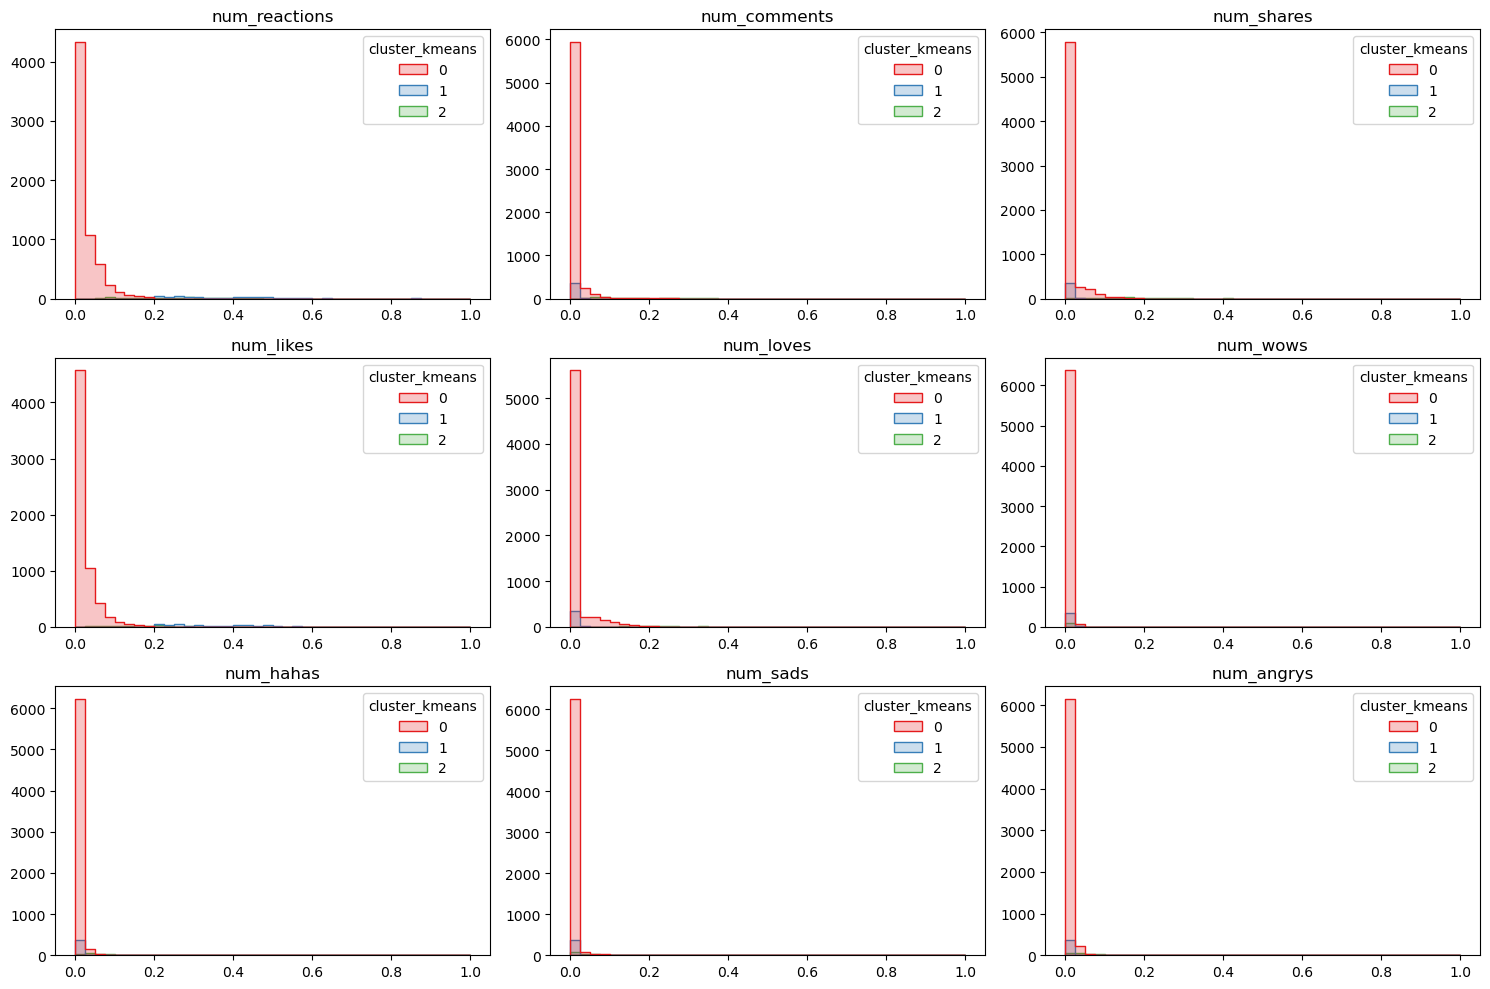

In [98]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, ax in enumerate(fig.get_axes()):
        feature = fb.columns[1:13][i]
        sns.histplot(X_scaled_pca, x=feature, bins=40, hue='cluster_kmeans', element='step', palette='Set1', ax=ax)
        ax.set_title(feature)
        ax.set_ylabel('')
        ax.set_xlabel('')
plt.tight_layout()
plt.show()

Ahora podemos aplicar el modelo de clutering jerárquico. En este caso, para asignar el número inicial de clusters, en primer lugar hay que trazar un Dendrograma. Podemos observar en la parte inferior de este gráfico que se nos proporciona un cluster por cada observación y, a medida que va subiendo, se van hacienda clusters más grandes que incluyen más registros hasta llegar a uno que contiene todas las observaciones.

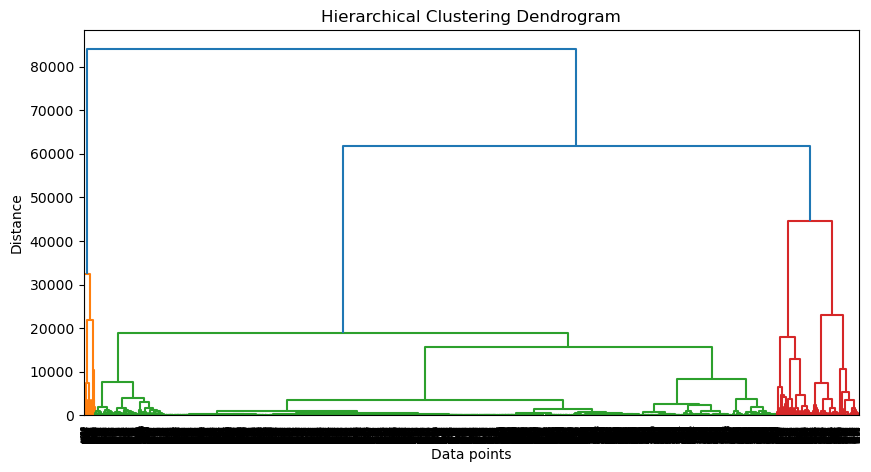

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

Una vez disponemos del gráfico, lo que tenemos que hacer es trazar una línea transversal que interseccione con el cluster que contiene al resto de clusters.

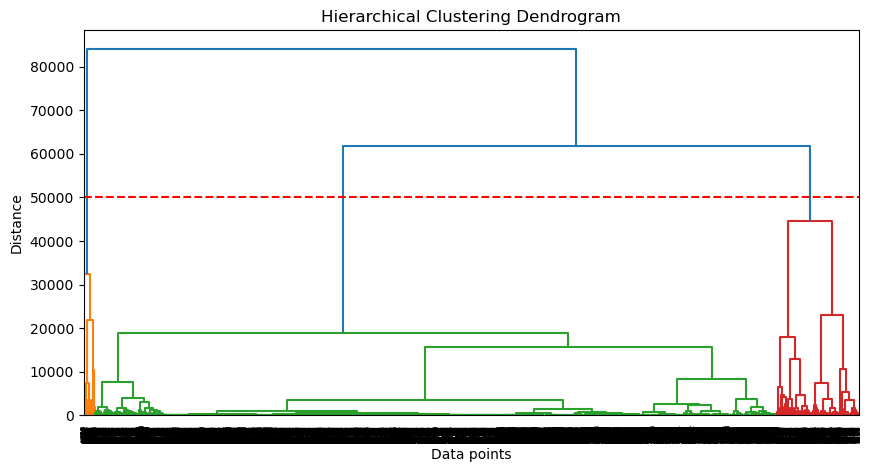

In [100]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=50000, color='r', linestyle='--')
plt.show()

Dado que la línea intersecciona en tres puntos, asignaremos 3 clusters para entrenar al modelo 'Agglomerative Clustering' y así asignar un cluester a cada registro tal y como acabamos de hacer con el modelo K-Means.

In [101]:
from sklearn.cluster import AgglomerativeClustering

cluster_agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_agglo.fit_predict(X_scaled_pca)

X_scaled_pca['cluster_agglomerative'] = cluster_agglo.labels_

Ya con la columna creada representamos la frecuancia de los clusters en relación a la totalidad de los registros.

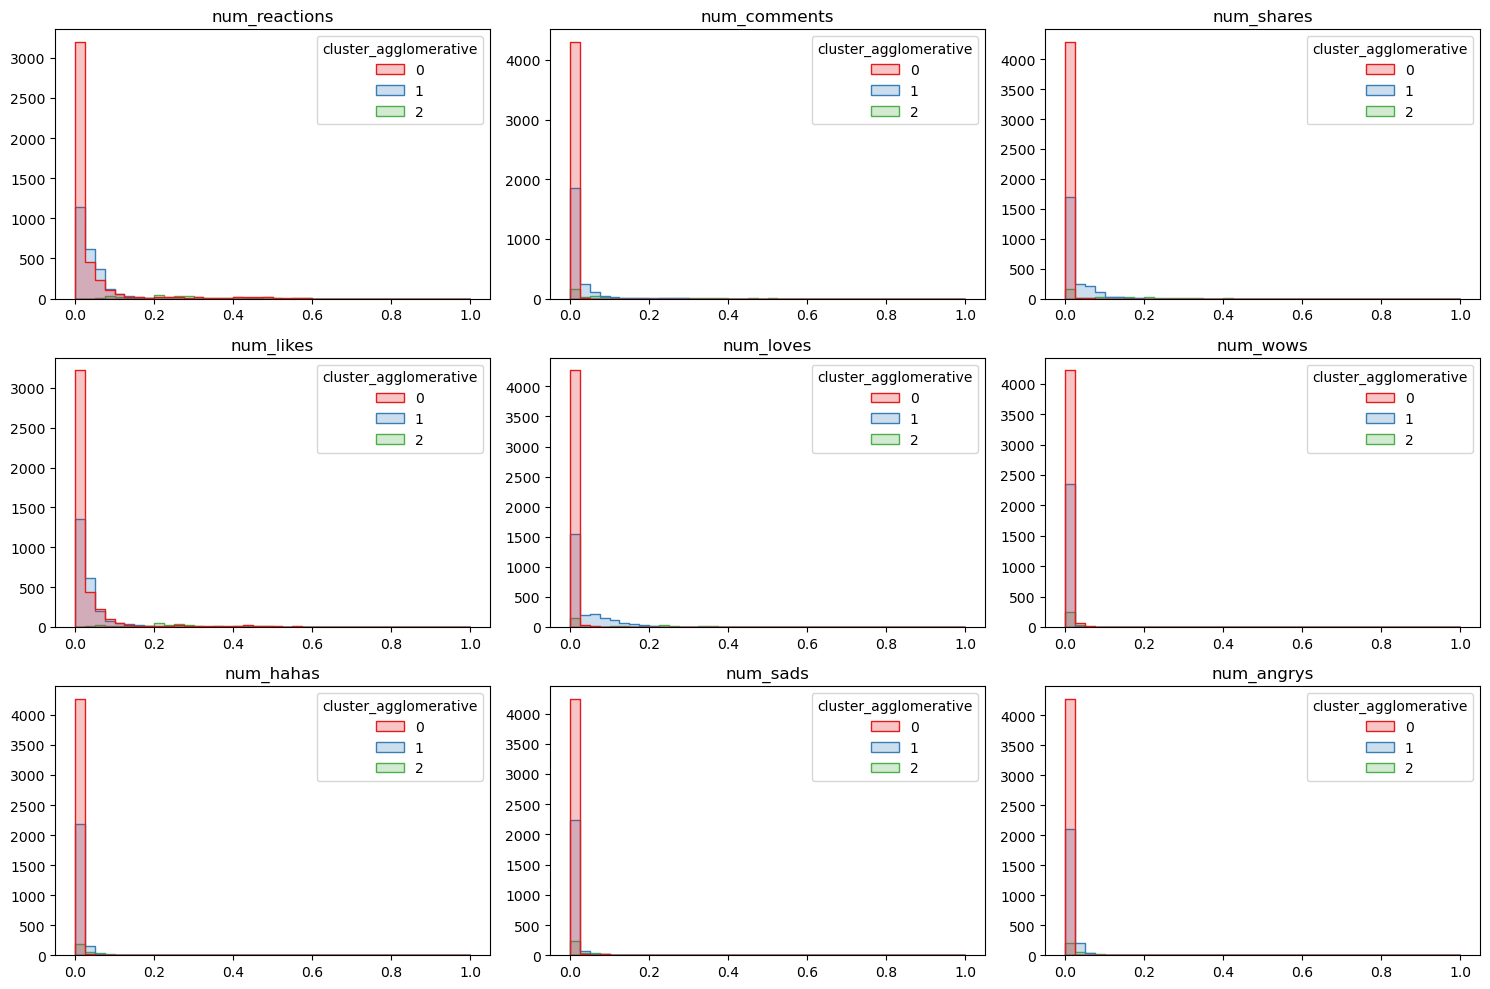

In [102]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, ax in enumerate(fig.get_axes()):
        feature = fb.columns[1:13][i]
        sns.histplot(X_scaled_pca, x=feature, bins=40, hue='cluster_agglomerative', element='step', palette='Set1', ax=ax)
        ax.set_title(feature)
        ax.set_ylabel('')
        ax.set_xlabel('')
plt.tight_layout()
plt.show()

Vemos que hay una gran coincidencia de la asignación de los clusters con la distribución original de los datos, por lo que comparamos de nuevo la suma de cada cada cluster y la suma del tipo de publicación 'status_type'.

In [103]:
print(X_scaled_pca.cluster_agglomerative.value_counts())
print(fb.status_type.value_counts())

0    4305
1    2361
2     331
Name: cluster_agglomerative, dtype: int64
photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64


Vemos que hay una gran coincidencia. Para acabar de comprobarlo lo representamos en un gráfico con los 3 componentes PC.

In [104]:
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2], colors[3] = ['red', 'yellow', 'blue', 'white']
fig = px.scatter_3d(X_scaled_pca, x='PC2', y='PC1', z='PC3', color=X_scaled_pca['cluster_agglomerative'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=True,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

Parece ser que también hay una distribución muy similar. Por último consultamos su exactitud.

In [105]:
correct_labels = sum(X_scaled_pca['cluster_agglomerative'] == X_scaled_pca['status_type_labels'])

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, X_scaled_pca['status_type_labels'].size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(X_scaled_pca['status_type_labels'].size)))

Result: 141 out of 6997 samples were correctly labeled.
Accuracy score: 0.02


Vemos que sucede lo mismo que con el modelo K-Means y la comparación está descalibrada. Sin embargo, si comparamos la columna 'status_type_labels' y 'cluster_agglomerative' vemos que hay una plena correspondencia en estos primeros 20 registros, por lo que el tipo de publicación 'vídeo' etiquetada en el cluster 1 equivale al 'status_type' 3, y la 'fotografía' asginada al cluster 0 equivale al 1 en 'status_type'.

In [106]:
X_scaled_pca[:20]

PC1       PC2       PC3  cluster_kmeans  status_type_labels  \
0   0.105164  0.106953 -0.024809               0                   3   
1  -0.025524 -0.021499 -0.001739               0                   1   
2   0.001872  0.010861 -0.004376               0                   3   
3  -0.036944 -0.018938 -0.002081               0                   1   
4  -0.006063 -0.015334 -0.006176               0                   1   
5  -0.005222 -0.019343 -0.005221               0                   1   
6   0.092991  0.076445 -0.031798               0                   3   
7   0.024321  0.026163 -0.002810               0                   3   
8  -0.009438 -0.019238 -0.004008               0                   1   
9  -0.019274 -0.019087 -0.002863               0                   1   
10 -0.006979 -0.016286 -0.006476               0                   1   
11 -0.003462 -0.017538 -0.009831               0                   1   
12  0.023150 -0.023561 -0.006490               0                   1   
13 -0.007233 -0.015420 -0.007031               0                   1   
14  0.033131 -0.021999 -0.006672               0                   1   
15  0.032137  0.004834 -0.011910               0                   3   
16 -0.024963  0.014782 -0.000345               0                   3   
17 -0.021528  0.008803 -0.000283               0                   3   
18  0.000018  0.014603 -0.009918               0                   3   
19 -0.024594 -0.018160 -0.003309               0                   1   

    num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0        0.112314      0.024393    0.076519   0.091720   0.140030  0.010791   
1        0.031847      0.000000    0.000000   0.031847   0.000000  0.000000   
2        0.048195      0.011243    0.016647   0.043312   0.031963  0.003597   
3        0.023567      0.000000    0.000000   0.023567   0.000000  0.000000   
4        0.045223      0.000000    0.000000   0.043312   0.013699  0.000000   
5        0.046072      0.000286    0.000000   0.044798   0.007610  0.003597   
6        0.106794      0.029252    0.021028   0.088747   0.106545  0.035971   
7        0.062633      0.021582    0.015479   0.055202   0.048706  0.003597   
8        0.043100      0.000048    0.000000   0.042038   0.007610  0.000000   
9        0.036093      0.000429    0.000292   0.035456   0.004566  0.000000   
10       0.044586      0.000095    0.000876   0.042887   0.010654  0.003597   
11       0.047134      0.000191    0.000000   0.045223   0.007610  0.014388   
12       0.066454      0.000191    0.000584   0.064756   0.009132  0.007194   
13       0.044374      0.000191    0.000000   0.042463   0.012177  0.003597   
14       0.073461      0.000524    0.000000   0.071125   0.015221  0.003597   
15       0.070488      0.004764    0.008762   0.064331   0.035008  0.003597   
16       0.028662      0.012196    0.023072   0.024841   0.027397  0.000000   
17       0.031847      0.008242    0.013727   0.028025   0.024353  0.003597   
18       0.046921      0.007909    0.010514   0.040764   0.042618  0.000000   
19       0.032272      0.000095    0.000000   0.031635   0.004566  0.000000   

    num_hahas  num_sads  num_angrys  cluster_agglomerative  
0    0.006369  0.019608    0.000000                      1  
1    0.000000  0.000000    0.000000                      0  
2    0.006369  0.000000    0.000000                      1  
3    0.000000  0.000000    0.000000                      0  
4    0.000000  0.000000    0.000000                      0  
5    0.000000  0.000000    0.000000                      0  
6    0.012739  0.000000    0.096774                      1  
7    0.006369  0.000000    0.032258                      1  
8    0.000000  0.000000    0.000000                      0  
9    0.000000  0.000000    0.000000                      0  
10   0.000000  0.000000    0.000000                      0  
11   0.000000  0.000000    0.000000                      0  
12   0.000000  0.000000    0.000000        

Queda pendiente en este trabajo obtener resultados más fáciles de visualizar, pero vemos con claridad que el modelo Aggregative Clustering obtiene un gran acierto, mientras que el modelo K-Means no se ha desarrolado nada bien.